## G2M insight for Cab Investment firm

By: Amr Elbana

<p>What is the business problem?
we want to know which transportation company to invest in.

<p>What are the properties of the data provided (data intake report)
Data contain many related information that could give us insights.

<p>What steps did you take in order to create an applicable data set?
I cleaned the data by cleaning some of the bad data (e.g dates and the prices)

#### Import Libraries

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
from matplotlib.ticker import StrMethodFormatter #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from datetime import datetime, date, timedelta

#### Load data

In [2]:
transaction = pd.read_csv('Data/Transaction_ID.csv')
transaction.shape

(440098, 3)

In [3]:
customer = pd.read_csv('Data/Customer_ID.csv')
customer.shape

(49171, 4)

In [4]:
city = pd.read_csv('Data/City.csv')
city.shape

(20, 3)

In [5]:
cab = pd.read_csv('Data/Cab_Data.csv')
cab.shape

(359392, 7)

In [6]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


#### Connect tables

In [10]:
# join the new table with the "Customer_ID" table
cust_trans = pd.merge(
    customer,
    transaction,
    on = "Customer ID"
)
cust_trans.head(3)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card


In [11]:
# join the "Cab_Data" table with the "cust_trans" table
Cust_trans_cab = pd.merge(
    cust_trans,
    cab,
    on = "Transaction ID"
)
Cust_trans_cab.head(3)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020


In [12]:
# join the "Cust_trans_cab" table with the "city" table
Cust_trans_cab_city = pd.merge(
    Cust_trans_cab,
    city,
    on = "City"
)
Cust_trans_cab_city.head(3)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"


In [13]:
df = Cust_trans_cab_city.copy()

#### Data Preprocessing

In [14]:
# Rename Columns

df = df.rename(columns={"Customer ID": "Cust_ID", "Income (USD/Month)": "income/month", "Transaction ID": "Trans_ID",
                        "Date of Travel": "Travel_Date", "KM Travelled": "Distance", "Price Charged": "Total_Price",
                       "Cost of Trip": "Trip_price"})

In [15]:
# Rows containing duplicate data

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [16]:
df.isnull().sum()

Cust_ID         0
Gender          0
Age             0
income/month    0
Trans_ID        0
Payment_Mode    0
Travel_Date     0
Company         0
City            0
Distance        0
Total_Price     0
Trip_price      0
Population      0
Users           0
dtype: int64

In [17]:
df['Population'] = df['Population'].apply(lambda x: int(x.replace(',', '')))
df['Users'] = df['Users'].apply(lambda x: int(x.replace(',', '')))
df.shape

(359392, 14)

In [18]:
##Handling Traveling Date

df["Travel_Date"] = df["Travel_Date"].apply(lambda x: date(1900, 1, 28) + timedelta(x))
# display
df.head(3)

,Cust_ID,Gender,Age,income/month,Trans_ID,Payment_Mode,Travel_Date,Company,City,Distance,Total_Price,Trip_price,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,29290,Male,28,10813,10351127,Cash,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,29290,Male,28,10813,10412921,Card,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701


In [19]:
Earliest_date = df["Travel_Date"].min()
Recent_date = df["Travel_Date"].max()
Earliest_date, Recent_date

(datetime.date(2016, 1, 31), datetime.date(2019, 1, 29))

In [20]:
# Convert travel date to time 
df["Travel_Date"] = pd.to_datetime(df['Travel_Date'], errors='coerce')

In [21]:
# extract month from Travel_Date to create new columns
df['month'] = df['Travel_Date'].dt.month_name()

In [22]:
# extract day_of_week from Travel_Date to create new columns
df['day_of_week'] = df['Travel_Date'].dt.day_name()

In [23]:
# extract weekday from Travel_Date to create new columns
df['weekday'] = df['Travel_Date'].dt.weekday

In [24]:
df.head()

,Cust_ID,Gender,Age,income/month,Trans_ID,Payment_Mode,Travel_Date,Company,City,Distance,Total_Price,Trip_price,Population,Users,month,day_of_week,weekday
0,29290,Male,28,10813,10000011,Card,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,February,Saturday,5
1,29290,Male,28,10813,10351127,Cash,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,August,Sunday,6
2,29290,Male,28,10813,10412921,Card,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,December,Saturday,5
3,27703,Male,27,9237,10000012,Card,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,February,Thursday,3
4,27703,Male,27,9237,10320494,Card,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,May,Sunday,6


### EDA 

In [25]:
# Checking the data shape
df.shape

(359392, 17)

In [26]:
# Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Cust_ID       359392 non-null  int64         
 1   Gender        359392 non-null  object        
 2   Age           359392 non-null  int64         
 3   income/month  359392 non-null  int64         
 4   Trans_ID      359392 non-null  int64         
 5   Payment_Mode  359392 non-null  object        
 6   Travel_Date   359392 non-null  datetime64[ns]
 7   Company       359392 non-null  object        
 8   City          359392 non-null  object        
 9   Distance      359392 non-null  float64       
 10  Total_Price   359392 non-null  float64       
 11  Trip_price    359392 non-null  float64       
 12  Population    359392 non-null  int64         
 13  Users         359392 non-null  int64         
 14  month         359392 non-null  object        
 15  day_of_week   359

In [27]:
# Checking the data statistics
df.describe()

,Cust_ID,Age,income/month,Trans_ID,Distance,Total_Price,Trip_price,Population,Users,weekday
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,3.381169
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,2.237242
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,0.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,1.000000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,4.000000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,5.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,6.000000


In [28]:
# print value counts for City
City = df['City'].value_counts()

print(City)

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64


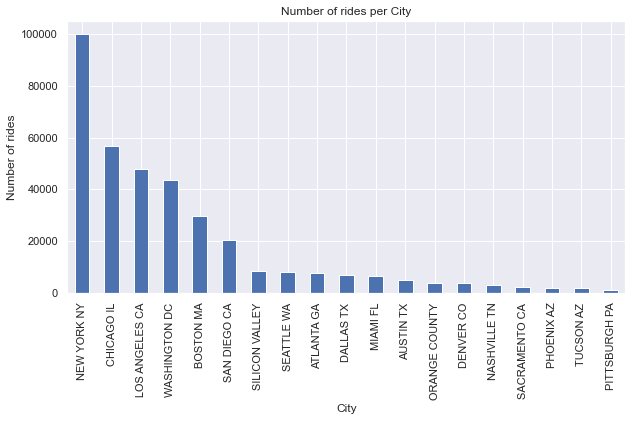

In [29]:
# Plotting a Histogram
City.plot(kind='bar', figsize=(10,5))
plt.title("Number of rides per City")
plt.ylabel('Number of rides')
plt.xlabel('City')
plt.show();

The city that has the most traffic is NewYork

In [306]:
# print value counts for Company
Company = df['Company'].value_counts()

print(Company)

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


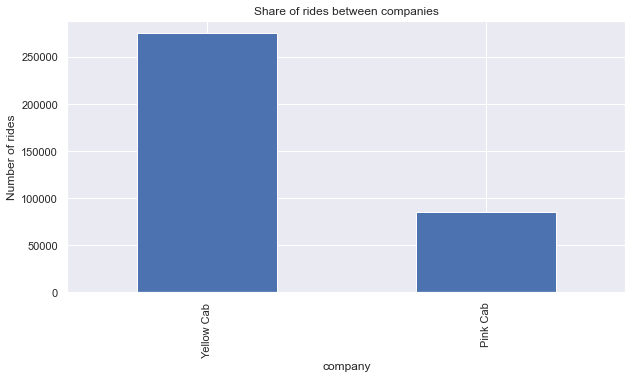

In [307]:
# Plotting a Histogram
Company.plot(kind='bar', figsize=(10,5))
plt.title("Share of rides between companies")
plt.ylabel('Number of rides')
plt.xlabel('company')
plt.show();

Yellow Cab is the most used company in transportation.

In [308]:
# print value counts for Payment_Mode
Payment_mode = df['Payment_Mode'].value_counts()

print(Payment_mode)

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64


In [37]:
card = df[df['Payment_Mode'] == 'Card']
cash = df[df['Payment_Mode'] == 'Cash']

In [36]:
pct = len(card) / (len(card)+len(cash))
pct

0.5996349390081026

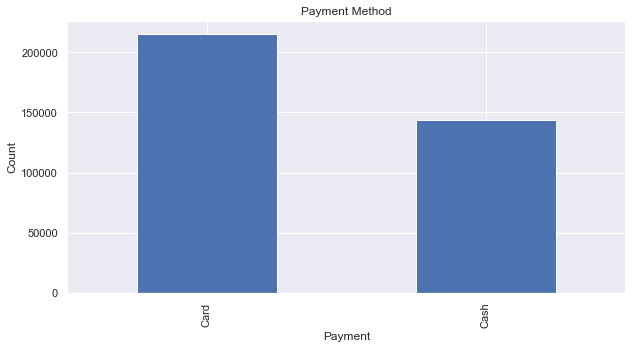

In [309]:
# Plotting a Histogram
Payment_mode.plot(kind='bar', figsize=(10,5))
plt.title("Payment Method")
plt.ylabel('Count')
plt.xlabel('Payment')
plt.show();

About 60 % of the passengers prefer to pay by card according to the previous visualization

In [318]:
# TO DO: Display counts of gender
gender_count = df['Gender'].value_counts()
gender_count

Male      205912
Female    153480
Name: Gender, dtype: int64

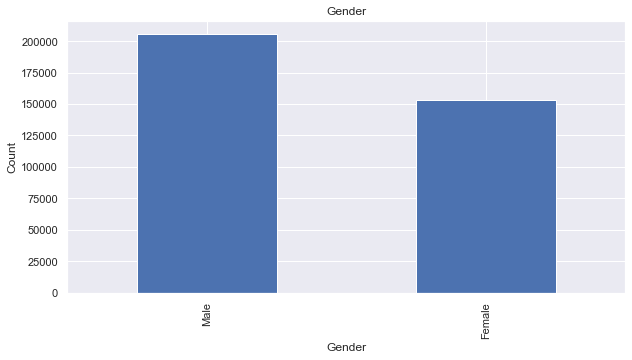

In [319]:
# Plotting a Histogram
gender_count.plot(kind='bar', figsize=(10,5))
plt.title("Gender")
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show();

From the previous visualization, it is abvious that many of the rides are taken by men.

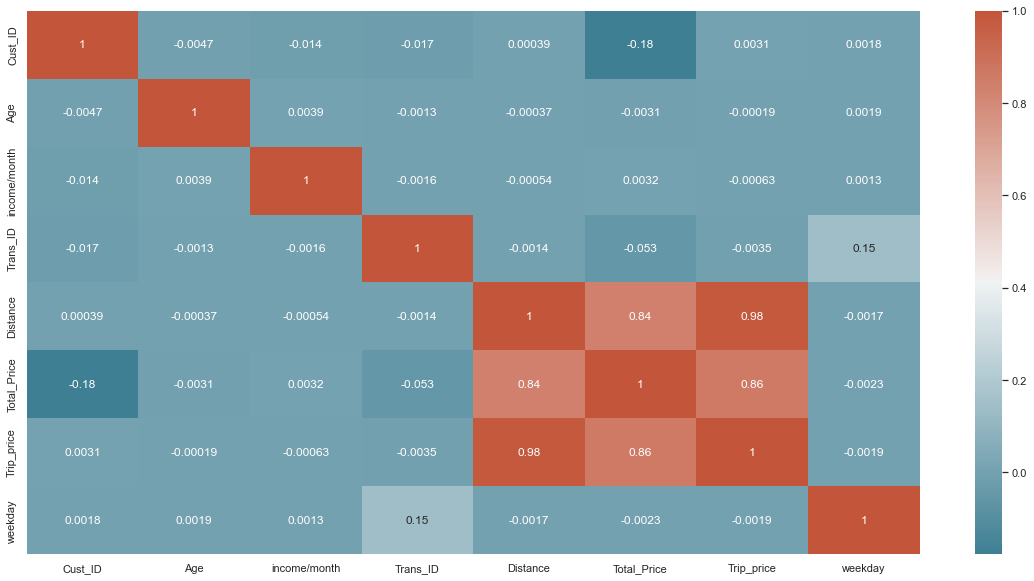

In [310]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show();
#We can see that there is a positive correlation between price and year and a negative correlation between price and odometer. This makes sense as newer cars are generally more expensive, and cars with more mileage are relatively cheaper. We can also see that there is a negative correlation between year and odometer — the newer a car the less number of miles on the car.

From the previous heatmap: the distance is highly positively correlated with the trip and total prices.

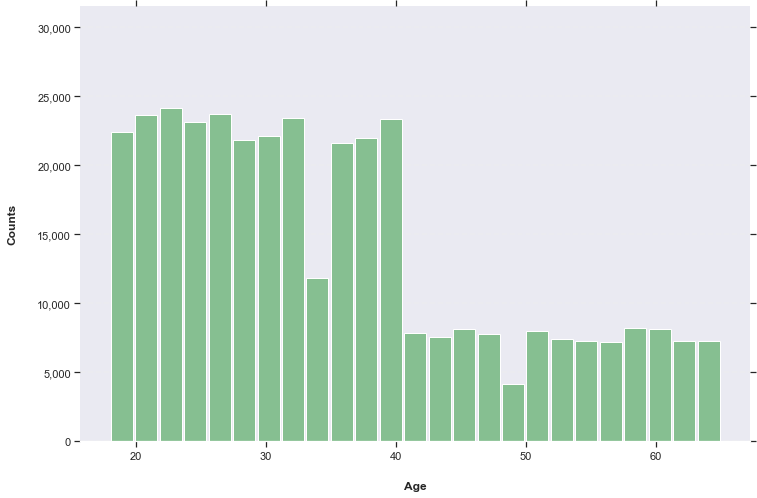

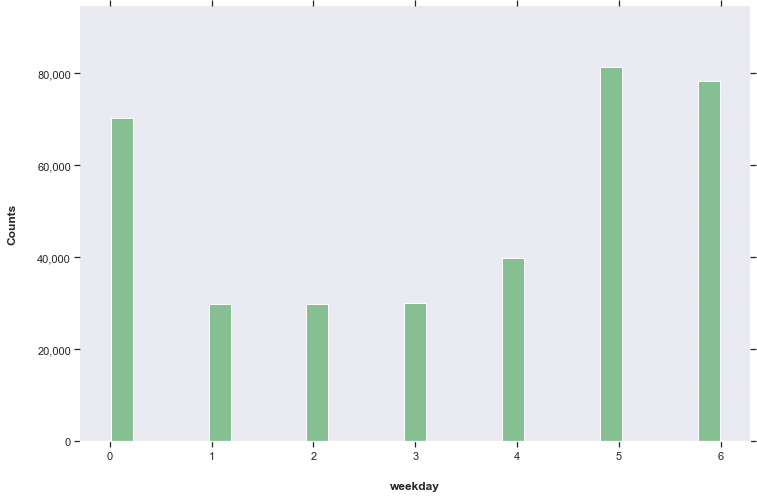

In [312]:
for col in ['Age', 'weekday']:
    ax = df.hist(column=col, bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(col, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

From the previous histograms, most of the rides were taken by passengers younger than 40 years. Also, there is a seasonality happens during the weekend on saturdays and sun

<AxesSubplot:>

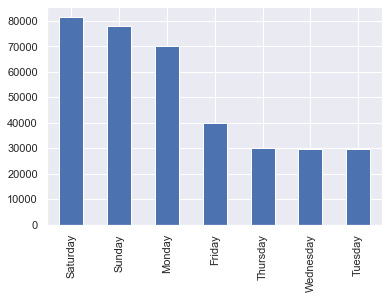

In [313]:
df['day_of_week'].value_counts().plot(kind='bar')


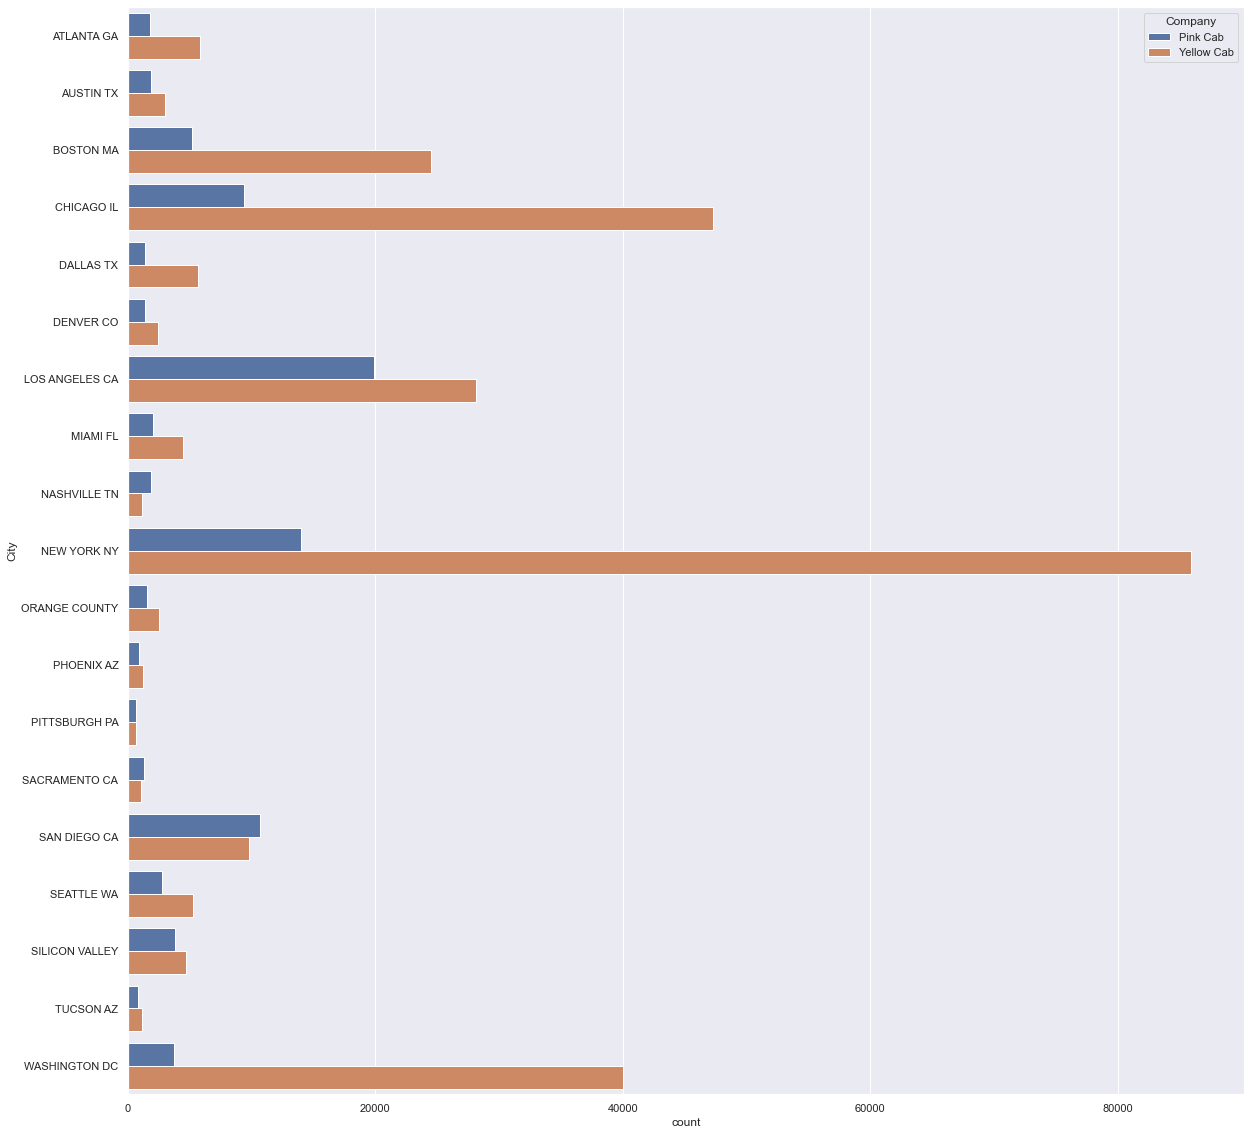

In [38]:
f, ax = plt.subplots(figsize=(20, 20))

ax = sns.countplot(y='City', hue='Company', data=df)
plt.show()

The previous visualization gives us an idea about how both company are working in each city, and from the chart yellow Cab company is doing more rides than the other company in almost all of the cities.

In [40]:
df.shape

(359392, 17)

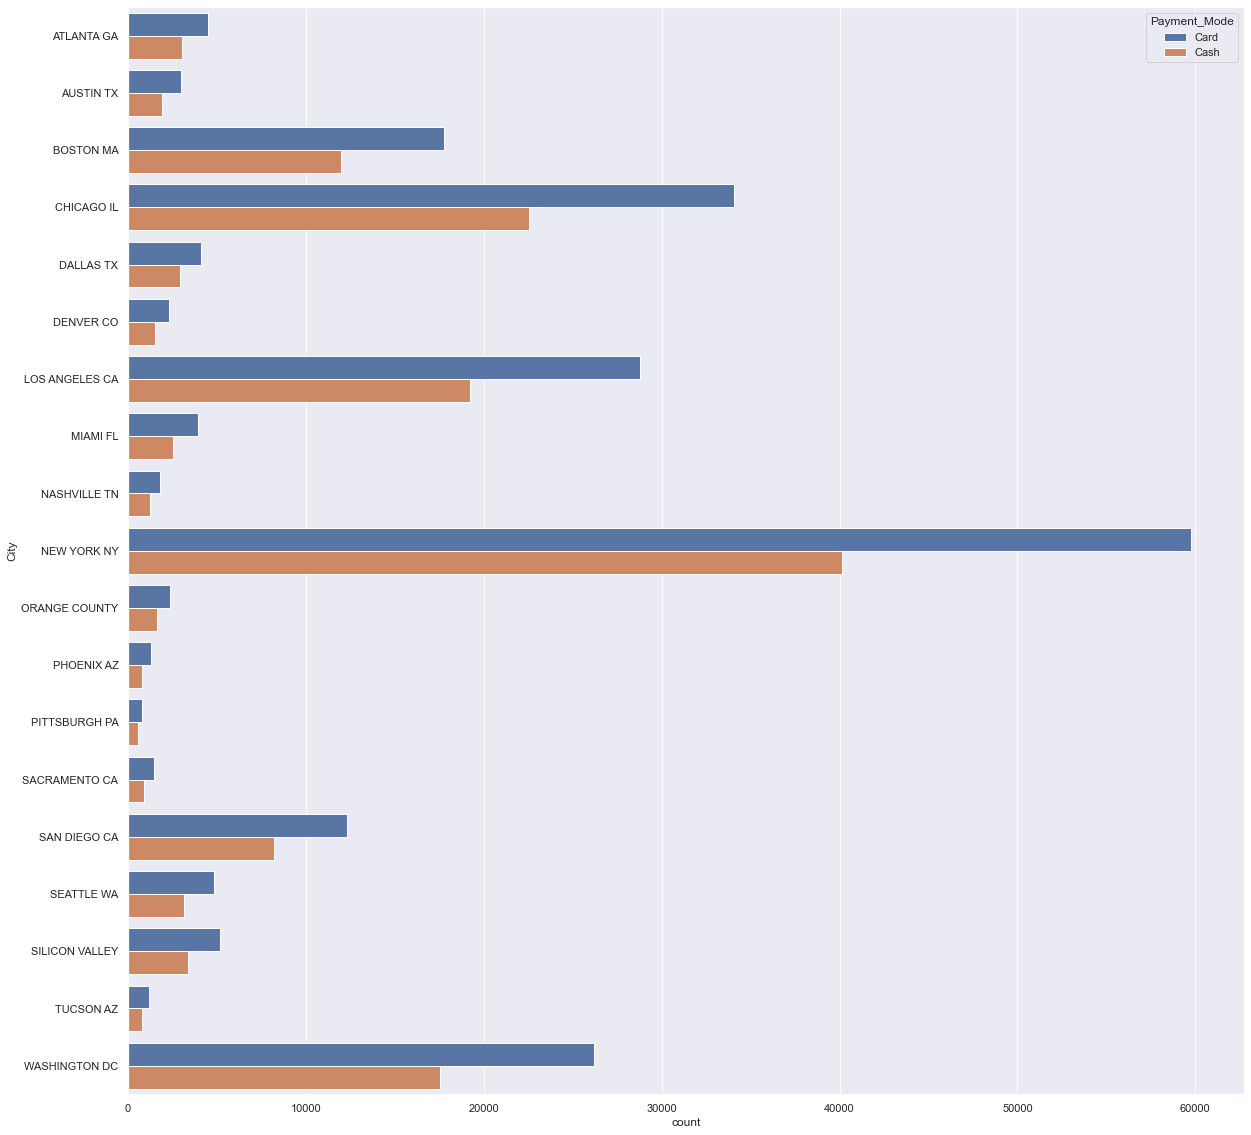

In [41]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.countplot(y='City', hue='Payment_Mode', data=df)
plt.show();

<AxesSubplot:title={'center':'Total Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

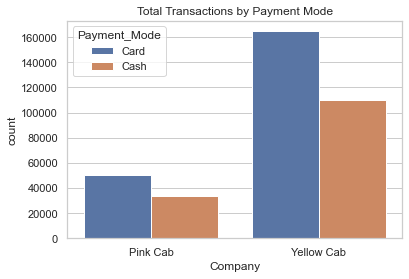

In [46]:
plt.title("Total Transactions by Payment Mode")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=df)

From the previous visualization, we could got insight that when passengers are using pink_cap, they in 60 % pays in cash while the same percent pay by card when using yellow_cab

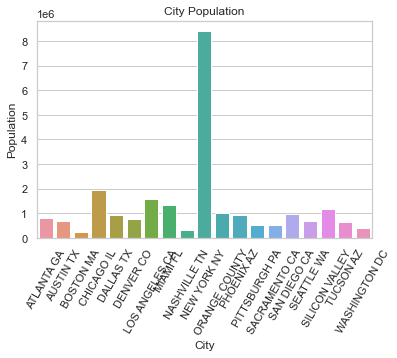

In [54]:
# City Population

plt.title("City Population")
sns.barplot(x="City", y="Population", data=df)
plt.xticks(rotation=60)
plt.show();

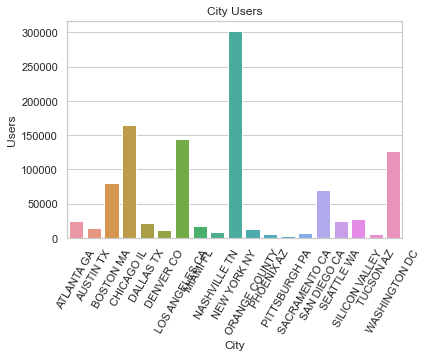

In [55]:
# City Users

plt.title("City Users")
sns.barplot(x="City", y="Users", data=df)
plt.xticks(rotation=60)
plt.show();

#### Conclsion

The above Exploratory Data Analysis (EDA) explore the data from many sides. The data has no null values or dplicates. The timeof the trip was not in a good format, so i extracted some information about the most crowded days in the month and in each week.

Many passengers are using Yellow_cab more than pink cab. Most of the rides are done on weekends and on mondays. A lot of rides takes place iat the christmas time.

In general yellow_cab is a better choice to invest in.